In [3]:
import sys, cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import collections

# Reading Dumped data

In [4]:
with open('sortedFish.pik','rb') as f:
    sortedFish=pickle.load(f)

posU=sortedFish[0]
nonOverlappingRange=sortedFish[1]
fishU=sortedFish[2]

fishU=frame,fish,pixel,[row,col,grey]

# Creating a distance histogram out of the sorted data

### Creating histograms for the first fish over the first nonoverlapping range

In [ ]:
binsDist=np.linspace(0,30,20)
binsDif=np.linspace(0,50,20)
binsSum=np.linspace(150,350,20)
histSum=np.zeros((len(binsDist)-1,len(binsSum)-1))
histDif=np.zeros((len(binsDist)-1,len(binsDif)-1))

pairData=[]
countSum=0
countDif=0
for k in range(*nonOverlappingRange[0]):
    fishA=fishU[k][0]
    for i in range(fishA.shape[0]):
        for j in range(i):
            d=np.sqrt((fishA[i,0]-fishA[j,0])**2+(fishA[i,1]-fishA[j,1])**2)
            bSum=fishA[i,2]+fishA[j,2]
            bDiff=fishA[i,2]-fishA[j,2]
            pairData.append([d,bSum,bDiff])
    pairDataT = np.array(pairData).T
    heightValuesSum,_,_=np.histogram2d(pairDataT[0],pairDataT[1],bins=(binsDist,binsSum))
    histSum+=heightValuesSum
    countSum+=1
    heightValuesDif,_,_=np.histogram2d(pairDataT[0],pairDataT[2],bins=(binsDist,binsDif))
    histDif+=heightValuesDif
    countDif+=1
histSum/=countSum
histDif/=countDif

In [ ]:
fig=plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
plt.imshow(histSum[:,::-1].T,extent=[binsDist[0], binsDist[-1], binsSum[0], binsSum[-1]],aspect='auto')

ax = fig.add_subplot(122)
plt.imshow(histDif[:,::-1].T,extent=[binsDist[0], binsDist[-1], binsDif[0], binsDif[-1]],aspect='auto')

plt.show()

### Function to create histograms

In [7]:
def histMaker(histData,bins1,bins2):
    '''
    Creates a 2d histogram.
    
    Input:
        histData:Either histSum or histDif. Some sort of array?
        bins1:The distance bins. np.linspace(int,int,int)
        bins2:The sum/difference bins. np.linspace(int,int,int)
    '''
    fig=plt.figure(figsize=(10,5))
    
    plt.imshow(histData[:,::-1].T,extent=[bins1[0], bins1[-1], bins2[0], bins2[-1]],aspect='auto')
    
    plt.show()

### Creating histograms for two fish over the first two nonoverlapping ranges.

In [5]:
binsDist=np.linspace(0,30,20)
binsDif=np.linspace(0,50,20)
binsSum=np.linspace(150,350,20)
histSum=np.zeros((len(binsDist)-1,len(binsSum)-1))
histDif=np.zeros((len(binsDist)-1,len(binsDif)-1))

fishList={}
histSumList={}
histDifList={}

for i in range(2):
    for k in range(2):
        countSum=0
        countDif=0
        pairData=[]
        for j in range(*nonOverlappingRange[i]):
            fishList['fish%s-%s' % (k,j)] = fishU[j][k]
            for l in range(fishList['fish%s-%s' % (k,j)].shape[0]):
                for m in range(l):
                    d=np.sqrt((fishList['fish%s-%s' % (k,j)][l,0]-fishList['fish%s-%s' % (k,j)][m,0])**2+(fishList['fish%s-%s' % (k,j)][l,1]-fishList['fish%s-%s' % (k,j)][m,1])**2)
                    bSum=fishList['fish%s-%s' % (k,j)][l,2]+fishList['fish%s-%s' % (k,j)][m,2]
                    bDif=fishList['fish%s-%s' % (k,j)][l,2]-fishList['fish%s-%s' % (k,j)][m,2]
                    pairData.append([d,bSum,bDif])
            pairDataT = np.array(pairData).T
            heightValuesSum,_,_=np.histogram2d(pairDataT[0],pairDataT[1],bins=(binsDist,binsSum))
            histSum+=heightValuesSum
            countSum+=1
            heightValuesDif,_,_=np.histogram2d(pairDataT[0],pairDataT[2],bins=(binsDist,binsDif))
            histDif+=heightValuesDif
            countDif+=1
        histSum/=countSum
        histSumList['nonOverlappingRange%s-fish%s'%(i,k)]=histSum
        histDif/=countDif
        histDifList['nonOverlappingRange%s-fish%s'%(i,k)]=histDif

dict_keys(['nonOverlappingRange0-fish0', 'nonOverlappingRange0-fish1', 'nonOverlappingRange1-fish0', 'nonOverlappingRange1-fish1'])
nonOverlappingRange0-fish0


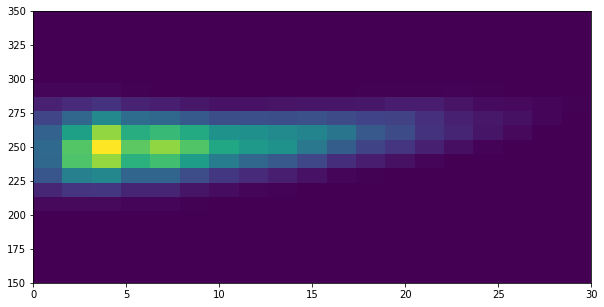

nonOverlappingRange0-fish1


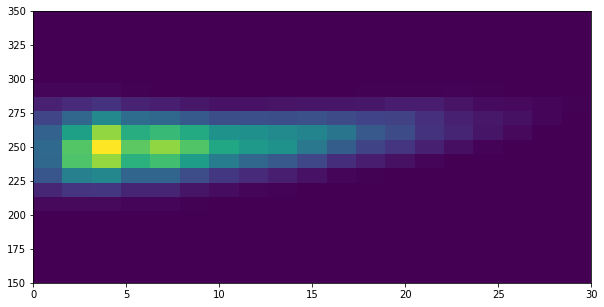

nonOverlappingRange1-fish0


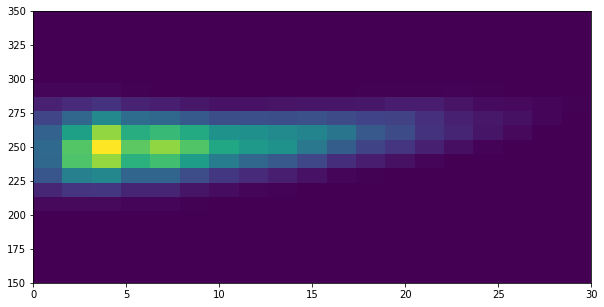

nonOverlappingRange1-fish1


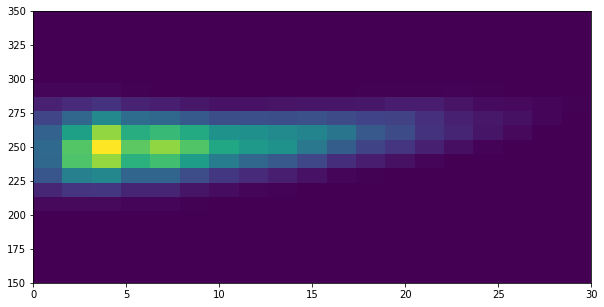

In [8]:
print(histSumList.keys())
for i in range(len(histSumList)):
    print(list(histSumList.keys())[i])
    histMaker(list(histSumList.values())[i],binsDist,binsSum)

### Checking distances between the histograms

In [ ]:
def swapStatus(histList,i):
    '''
    Detext swaps between consecutive nonOverlappingRanges based on brightness sum and difference.
    
    Input:
        histList: . Dictionary
        i: . Int.
    
    Output:
        Int. 0 if no swaps, 1 if swapped, 2 if overlapping.
    '''
    distanceMatrix=[np.linalg.norm(histList.values(2)-hist.values(0)),
        np.linalg.norm(histList.values(2)-hist.values(1)),
        np.linalg.norm(histList.values(3)-hist.values(0)),
        np.linalg.norm(histList.values(3)-hist.values(1))]
    (distanceMatrix[0]+distanceMatrix[1])-(distanceMatrix[2]+distanceMatrix[3])
    if abs(swapCriteron)<1e-10:
        return 2 #Overlapping
    elif swapCriteron>0:
        return 1 #Swapped
    elif swapCriteron<0:
        return 0 #Normal
    else:
        return -1